In [107]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math

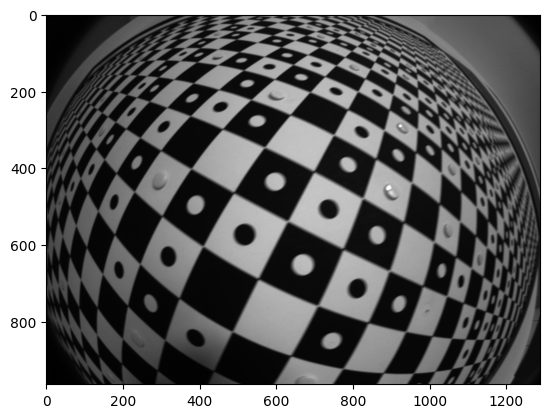

In [108]:
im1= plt.imread("Data/Radial01.png")
im2 =plt.imread("Data/Radial02.png")
plt.imshow(im2,cmap="gray")

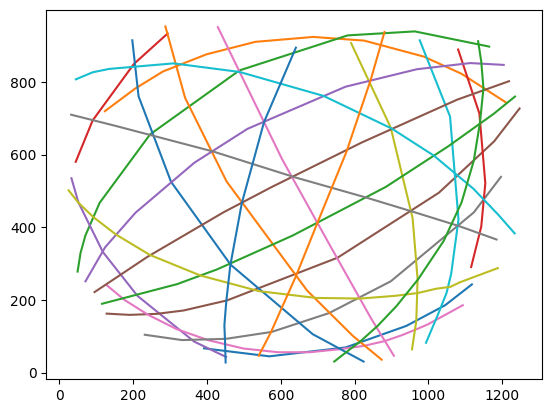

In [109]:
lines=sio.loadmat("Data/lines.mat")
lines=lines['lines'][0]
for l in lines:
    plt.plot(l[0],l[1])

In [110]:
im1.shape

(964, 1288)

In [111]:
#Data of camera
im_center = np.array([ 676, 503 ])
f = np.array([4,5,6])

In [112]:
class RadialDistortion:
    def __init__(self, img_center,polynom_params:np.array):
        assert(polynom_params.ndim==1 and polynom_params.shape[0]==3)

        self.im_center=img_center
        self.K1=polynom_params[0]
        self.K2=polynom_params[1]
        self.K3=polynom_params[2]



    """
    Calculates the position of the undistorted points given their distorted coordinates.
    """
    def undistortPoint(self,point:np.array)->np.array:
        assert(point.ndim==2,"Dimension of point should be 2!")
        pointDiff1=pow(im_center[0]-point[0],2)
        pointDiff2=pow(im_center[1]-point[1],2)
        r=math.sqrt(pointDiff1+pointDiff2)
        #print(r)

        polynom=(456*pow(r,2))

        dX=(point[0]-im_center[0])*polynom
        dY=(point[1]-im_center[1])*polynom

        print(polynom,point[0]-im_center[0],point[1]-im_center[1] )

        return point+np.array([dX,dY])

    """
    Given an image, and th knowing the parameters of the 
    distortion, undistorts the image.
    """
    def undistortImage(image:np.array)->np.array:
        pass


<>:16: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:16: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\hgand\AppData\Local\Temp\ipykernel_2084\2465681109.py:16: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(point.ndim==2,"Dimension of point should be 2!")


In [113]:

def undistortLines(line:np.array)->np.array:
    distortionModel=RadialDistortion(im_center,f)
    print(distortionModel)
    line=np.transpose(line)
    newLine=[]
    for point in line:
        undistortedPoint=distortionModel.undistortPoint(point)
        newLine.append(undistortedPoint)
    return np.array(newLine)

undistortedLines=[]
for l in lines:
    pass

123488547.32350868 -283.9157894736841 -436.1192982456139
100934921.03298238 -107.18245614035084 -458.10526315789457
90284508.32280697 99.99298245614045 -433.5824561403507
95707884.3789473 264.04210526315774 -374.38947368421043
108090416.34807011 368.898245614035 -317.73333333333323
119813830.73684208 441.621052631579 -260.23157894736823


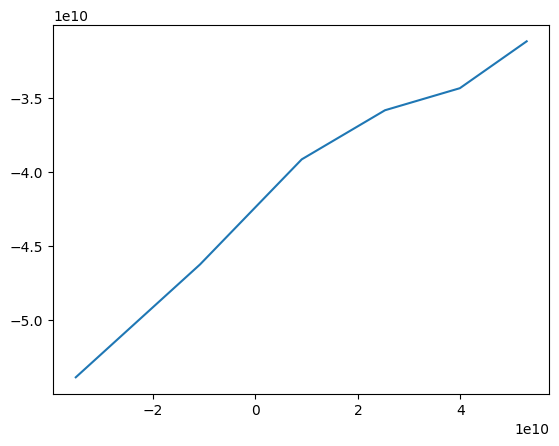

In [114]:
newLine=undistortLines(lines[0])
plt.plot(newLine[:,0],newLine[:,1])